In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Colab Notebooks/Dota_Simulator

import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/Dota_Simulator')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/.shortcut-targets-by-id/12QFJyRnVhjFL-I5c6E5gyBMOyT_jFnQS/Dota_Simulator


In [0]:
import torch
import joblib
import importlib
import warnings
dotasimlib = importlib.import_module("DOTA_simulator")

In [0]:
dotasimlib= importlib.reload(dotasimlib)

## Setup simulator

In [4]:
sim = dotasimlib.DotaSim()
sim.load_data("games_data/rd_cumulated_*", remove_constant_features=True);

4 Files to load
games_data/rd_cumulated_1.csv   	Imported: 13234 lines
games_data/rd_cumulated_2.csv   	Imported: 12884 lines
games_data/rd_cumulated_3.csv   	Imported: 13229 lines
games_data/rd_cumulated_4.csv   	Imported: 25067 lines
64414 Lines in the dataset


In [10]:
sim.set_model('ffnet', depth=1)

Using CUDA
Model dimensions: (210, 23) => 210
Model type:
 FFNet(
  (input_layer): Input(
    (layer): Linear(in_features=233, out_features=512, bias=True)
  )
  (hidden): ModuleList(
    (0): Linear(in_features=512, out_features=512, bias=True)
  )
  (output_layer): Output(
    (layer): Linear(in_features=512, out_features=210, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
)


### Train model

Training...
> 1 	/ 500 	Train Loss: 1.8575  	| Validation Loss: 0.6821
> 2 	/ 500 	Train Loss: 0.6562  	| Validation Loss: 0.6523
> 3 	/ 500 	Train Loss: 0.6369  	| Validation Loss: 0.6331
> 4 	/ 500 	Train Loss: 0.6258  	| Validation Loss: 0.6268
> 5 	/ 500 	Train Loss: 0.6179  	| Validation Loss: 0.6204
> 6 	/ 500 	Train Loss: 0.6141  	| Validation Loss: 0.6183
> 7 	/ 500 	Train Loss: 0.6108  	| Validation Loss: 0.6169
> 8 	/ 500 	Train Loss: 0.6091  	| Validation Loss: 0.6167
> 9 	/ 500 	Train Loss: 0.6077  	| Validation Loss: 0.6148
> 10 	/ 500 	Train Loss: 0.6062  	| Validation Loss: 0.6117
> 11 	/ 500 	Train Loss: 0.6059  	| Validation Loss: 0.6141
> 12 	/ 500 	Train Loss: 0.6045  	| Validation Loss: 0.6125
> 13 	/ 500 	Train Loss: 0.6044  	| Validation Loss: 0.6126
> 14 	/ 500 	Train Loss: 0.6035  	| Validation Loss: 0.6128
> 15 	/ 500 	Train Loss: 0.6031  	| Validation Loss: 0.6116
> 16 	/ 500 	Train Loss: 0.6028  	| Validation Loss: 0.6116
> 17 	/ 500 	Train Loss: 0.6020  	| V

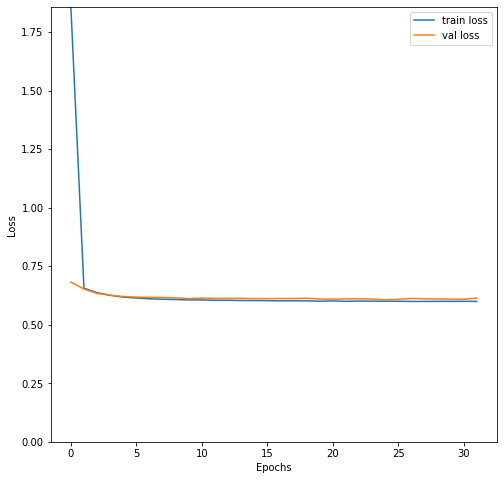

In [11]:
sim.train(epochs=500, batch_size=512, limit_overfit=20)

In [0]:
# sim.save_model("trained_model")

### Test Simulator

In [0]:
import time
t0 = time.time()
sim.reset()
sim.render()
for i in range(100):
    sim.step(0)
    sim.render()
print("Run time: %.2f s" %(time.time()-t0))

Env Reset
0 > Time: 0 | (-6700 , -6700)
1 > Time: 126 | (-6767 , -2560)
2 > Time: 47 | (-5168 , -4232)
3 > Time: 53 | (-4827 , -4525)
4 > Time: 126 | (-4370 , -2560)
5 > Time: 114 | (-3610 , -3311)
6 > Time: 126 | (-3548 , -2560)
7 > Time: 126 | (-2771 , -2970)
8 > Time: 126 | (-3024 , -2858)
9 > Time: 124 | (-3089 , -2813)
10 > Time: 126 | (-3096 , -2842)
11 > Time: 125 | (-2771 , -2844)
12 > Time: 124 | (-2948 , -2560)
13 > Time: 123 | (-2904 , -2654)
14 > Time: 126 | (-2771 , -2560)
15 > Time: 123 | (-2819 , -2560)
16 > Time: 123 | (-2771 , -2560)
17 > Time: 122 | (-2822 , -2577)
18 > Time: 126 | (-2851 , -2609)
19 > Time: 123 | (-2902 , -2560)
20 > Time: 126 | (-2899 , -2560)
21 > Time: 126 | (-2771 , -2560)
22 > Time: 122 | (-2860 , -2560)
23 > Time: 126 | (-2866 , -2623)
24 > Time: 126 | (-2886 , -2560)
25 > Time: 126 | (-2880 , -2560)
26 > Time: 124 | (-2912 , -2669)
27 > Time: 126 | (-2955 , -2659)
28 > Time: 126 | (-2938 , -2693)
29 > Time: 126 | (-2986 , -2560)
30 > Time: 123

## Get Behavior

In [21]:
# Dummy decision functions
import random
def random_decision_func(state):
    return random.randint(0, 29)

def constant_decision_func(state):
    return 0

# Create simulator
sim = dotasimlib.DotaSim()
sim.set_model(name="trained_model")

# Evaluate behaviors
render = True # Print info at each step
print('\nRandom agent')
actions_list = sim.run_steps(random_decision_func, n_steps=100, render=render)
print(len(actions_list), "Actions:\n", actions_list)

print("\Immobile agent:")
actions_list = sim.run_steps(constant_decision_func, n_steps=100, render=render)
print(len(actions_list), "Actions:\n", actions_list)

Model dimensions: (310, 23) => 310
Model type:
 DotaUNet(
  (input_layer): Input(
    (layer): Linear(in_features=233, out_features=256, bias=True)
  )
  (down1): Down(
    (layer): Linear(in_features=256, out_features=128, bias=True)
  )
  (down2): Down(
    (layer): Linear(in_features=128, out_features=64, bias=True)
  )
  (bottom): Down(
    (layer): Linear(in_features=64, out_features=64, bias=True)
  )
  (up1): Up(
    (layer): Linear(in_features=64, out_features=128, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (concat1): ConcatConv(
    (conv): Conv1d(2, 1, kernel_size=(3,), stride=(1,), padding=(1,))
  )
  (up2): Up(
    (layer): Linear(in_features=128, out_features=256, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (concat2): ConcatConv(
    (conv): Conv1d(2, 1, kernel_size=(3,), stride=(1,), padding=(1,))
  )
  (output_layer): Output(
    (layer): Linear(in_features=256, out_features=210, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)